# Result

In [1]:
#!/usr/bin/python -tt
# -*- coding: utf-8 -*-

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from scipy.stats import t
from scipy import stats
from tqdm import tqdm_notebook as tqdm

import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

%matplotlib inline

In [3]:
from methods.evaluation import Evaluation, EvaluationPrecision, EvaluationRecall, EvaluationFscore

https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

In [4]:
'''
    DeepQL_topics (0.30196078431372547, 0.6862745098039216, 0.2901960784313726) verde
    DMS (0.21568627450980393, 0.49411764705882355, 0.7215686274509804) azul
    DWEN (0.9333333333333333, 0.5215686274509804, 0.2901960784313726) laranja
    DeepQL_weighted (0.5843137254901961, 0.4235294117647059, 0.7058823529411765) roxo
    DeepQL (0.5098039215686274, 0.7764705882352941, 0.8862745098039215) azul claro
    DeepTL (0.8941176470588236, 0.10196078431372549, 0.10980392156862745) vermelho
    DeepTL_topics (0.5490196078431373, 0.3803921568627451, 0.23529411764705882) marrom
''' 

'\n    DeepQL_topics (0.30196078431372547, 0.6862745098039216, 0.2901960784313726) verde\n    DMS (0.21568627450980393, 0.49411764705882355, 0.7215686274509804) azul\n    DWEN (0.9333333333333333, 0.5215686274509804, 0.2901960784313726) laranja\n    DeepQL_weighted (0.5843137254901961, 0.4235294117647059, 0.7058823529411765) roxo\n    DeepQL (0.5098039215686274, 0.7764705882352941, 0.8862745098039215) azul claro\n    DeepTL (0.8941176470588236, 0.10196078431372549, 0.10980392156862745) vermelho\n    DeepTL_topics (0.5490196078431373, 0.3803921568627451, 0.23529411764705882) marrom\n'

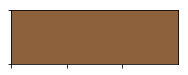

In [5]:
sns.palplot((0.5490196078431373, 0.3803921568627451, 0.23529411764705882))

In [6]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

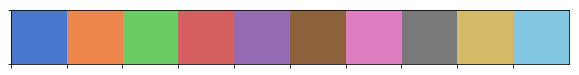

In [7]:
sns.palplot(sns.color_palette("muted"))

In [196]:
domains = ['eclipse', 'netbeans', 'openoffice'] # 'firefox' 
PREPROCESSING = 'bert'
approaches = ['baseline', 'baseline_dwen', 'deepQL_topics', 'deepQL_topics_trainable',
              'deepQL_trainable', 'deepQL_no_trainable', 'deepTL', 'deepTL_topics'] # 'DWEN_QL', 'DMS_QL', 'deepQL_weights' , 
methods = {}
authors = {}
markers = {}
colors = {
    'DMS' : (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), # azul
    'DWEN' : (0.9333333333333333, 0.5215686274509804, 0.2901960784313726), # laranja
    'DeepQL_topics' : (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), # verde
    'DeepQL_topics_trainable' : (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
    'DeepQL' : (0.5098039215686274, 0.7764705882352941, 0.8862745098039215), # azul claro
    'DeepQL_trainable' : (0.5843137254901961, 0.4235294117647059, 0.7058823529411765), # roxo
    'DeepTL' : (0.8941176470588236, 0.10196078431372549, 0.10980392156862745), # vermelho
    'DeepTL_topics' : (0.5490196078431373, 0.3803921568627451, 0.23529411764705882), # marrom
    'eclipse' : (0.8941176470588236, 0.10196078431372549, 0.10980392156862745), # vermelho,
    'netbeans' : (0.9333333333333333, 0.5215686274509804, 0.2901960784313726), # laranja
    'openoffice' : (0.21568627450980393, 0.49411764705882355, 0.7215686274509804) # azul
}
approaches_names = {
    'baseline' : 'DMS',
    'DMS_QL' : 'DMS_QL',
    'baseline_dwen' : 'DWEN',
    'DWEN_QL' : 'DWEN_QL',
    'deepQL_topics' : 'DeepQL_topics',
    'deepQL_topics_trainable' : 'DeepQL_topics_trainable',
    'deepQL_no_trainable' : 'DeepQL',
    'deepQL_trainable' : 'DeepQL_trainable',
    'deepTL' : 'DeepTL',
    'deepTL_topics' : 'DeepTL_topics'
}

friendly_names = {
    'DMS' : 'DMS',
    'DWEN' : 'DWEN',
    'DeepQL_topics' : 'SiameseQAT-A',
    'DeepQL_topics_trainable' : 'SiameseQAT-W',
    'DeepQL' : 'SiameseQA-A',
    'DeepQL_trainable' : 'SiameseQA-W',
    'DeepTL' : 'SiameseTA',
    'DeepTL_topics' : 'SiameseTAT'
}

approaches_symbols = {
    'baseline' : '.',
    'baseline_dwen' : '^',
    'deepQL_topics' : '<',
    'deepQL_no_trainable' : '*',
    'deepQL_weights' : '2',
    'DWEN_QL' : '>',
    'deepQL_trainable' : '4',
    'deepQL_topics_trainable' : '3',
    'deepTL' : 'D',
    'deepTL_topics' : '1',
    'DMS_QL' : '3'
}
epochs = ['100', '1000']
for i in epochs:
    if i not in methods:
        methods[i] = []
    for name in approaches:
        methods[i].append("{}_{}".format(name, i))
for i in epochs:
    for name in approaches:
        key = "{}_{}".format(name, i)
        authors[key] =  approaches_names[name]
for i in epochs:
    for name in approaches:
        key = "{}_{}".format(name, i)
        markers[key] =  approaches_symbols[name]

In [9]:
methods

{'100': ['baseline_100',
  'baseline_dwen_100',
  'deepQL_topics_100',
  'deepQL_topics_trainable_100',
  'deepQL_trainable_100',
  'deepQL_no_trainable_100',
  'deepTL_100',
  'deepTL_topics_100'],
 '1000': ['baseline_1000',
  'baseline_dwen_1000',
  'deepQL_topics_1000',
  'deepQL_topics_trainable_1000',
  'deepQL_trainable_1000',
  'deepQL_no_trainable_1000',
  'deepTL_1000',
  'deepTL_topics_1000']}

In [10]:
authors

{'baseline_100': 'DMS',
 'baseline_1000': 'DMS',
 'baseline_dwen_100': 'DWEN',
 'baseline_dwen_1000': 'DWEN',
 'deepQL_no_trainable_100': 'DeepQL',
 'deepQL_no_trainable_1000': 'DeepQL',
 'deepQL_topics_100': 'DeepQL_topics',
 'deepQL_topics_1000': 'DeepQL_topics',
 'deepQL_topics_trainable_100': 'DeepQL_topics_trainable',
 'deepQL_topics_trainable_1000': 'DeepQL_topics_trainable',
 'deepQL_trainable_100': 'DeepQL_trainable',
 'deepQL_trainable_1000': 'DeepQL_trainable',
 'deepTL_100': 'DeepTL',
 'deepTL_1000': 'DeepTL',
 'deepTL_topics_100': 'DeepTL_topics',
 'deepTL_topics_1000': 'DeepTL_topics'}

In [11]:
markers

{'baseline_100': '.',
 'baseline_1000': '.',
 'baseline_dwen_100': '^',
 'baseline_dwen_1000': '^',
 'deepQL_no_trainable_100': '*',
 'deepQL_no_trainable_1000': '*',
 'deepQL_topics_100': '<',
 'deepQL_topics_1000': '<',
 'deepQL_topics_trainable_100': '3',
 'deepQL_topics_trainable_1000': '3',
 'deepQL_trainable_100': '4',
 'deepQL_trainable_1000': '4',
 'deepTL_100': 'D',
 'deepTL_1000': 'D',
 'deepTL_topics_100': '1',
 'deepTL_topics_1000': '1'}

### Retrieval 

In [12]:
def evaluate_rank(evaluation, method, domain, epoch, aproach, recall, recall_index, epochs, datasets, symbols, path):
    #evaluation = Evaluation(0)
    try:
        if(path != ''):
            report = evaluation.evaluate(path)
        else:
            report = evaluation
        recall.append(report['0 - recall_at_1'])
        recall.append(report['1 - recall_at_5'])
        recall.append(report['2 - recall_at_10'])
        recall.append(report['3 - recall_at_15'])
        recall.append(report['4 - recall_at_20'])
        recall.append(report['5 - recall_at_25'])
        aproach += [authors[method]] * 6
        symbols += [markers[method]] * 6
        datasets += [domain] * 6
        epochs += [epoch] * 6
        recall_index += [1, 5, 10, 15, 20, 25]
        print(path)
        return report
    except Exception as e:
        print(e)
        print("Does not exist result for: {}".format(path))
        return
def create_dataframe(rank):
    recall = [] # recall binary
    recall_classic = [] # recall with groundtruth
    precision = []
    fscore = []
    fscore_classic = []
    aproach, recall_index, datasets, epochs, symbols = [], [], [], [], []
    df = pd.DataFrame(columns=['recall', 'precision', 'f_score', 'top@k', 'method', 'domain', 'epoch', 'symbol'])

    for epoch in ['100', '1000']:
        for domain in domains:
            # Domain to use
            DOMAIN = domain
            # Dataset paths
            DIR = 'data/processed/{}/{}'.format(DOMAIN, PREPROCESSING)
            for method in methods[epoch]:
                path = os.path.join(DIR, '{}_{}.txt'.format(rank, method))
                report_recall = evaluate_rank(Evaluation(0), method, domain, epoch, aproach, recall, recall_index, epochs, datasets, symbols, path)
                report_precision = evaluate_rank(EvaluationPrecision(0), method, domain, epoch, [], precision, [], [], [], [], path)
#                 report_recall_classic = evaluate_rank(EvaluationRecall(0), epoch, domain, recall_classic, [], path)
                if(report_precision != None and report_recall != None):
                    report_fscore = evaluate_rank(EvaluationFscore().evaluate(report_precision, report_recall), method, domain, epoch, [], fscore, [], [], [], [], '')
    
    df['recall'] = recall
    df['precision'] = precision
    df['f_score'] = fscore
    df['top@k'] = recall_index
    df['method'] = aproach
    df['domain'] = datasets
    df['epoch'] = epochs
    df['symbol'] = symbols
    return df

In [13]:
df = create_dataframe('exported_rank')
# df_master = create_dataframe('exported_rank_master')

data/processed/eclipse/bert/exported_rank_baseline_100.txt
data/processed/eclipse/bert/exported_rank_baseline_100.txt

data/processed/eclipse/bert/exported_rank_baseline_dwen_100.txt
data/processed/eclipse/bert/exported_rank_baseline_dwen_100.txt

data/processed/eclipse/bert/exported_rank_deepQL_topics_100.txt
data/processed/eclipse/bert/exported_rank_deepQL_topics_100.txt

data/processed/eclipse/bert/exported_rank_deepQL_topics_trainable_100.txt
data/processed/eclipse/bert/exported_rank_deepQL_topics_trainable_100.txt

data/processed/eclipse/bert/exported_rank_deepQL_trainable_100.txt
data/processed/eclipse/bert/exported_rank_deepQL_trainable_100.txt

data/processed/eclipse/bert/exported_rank_deepQL_no_trainable_100.txt
data/processed/eclipse/bert/exported_rank_deepQL_no_trainable_100.txt

data/processed/eclipse/bert/exported_rank_deepTL_100.txt
data/processed/eclipse/bert/exported_rank_deepTL_100.txt

data/processed/eclipse/bert/exported_rank_deepTL_topics_100.txt
data/processed/ecli

### Markers

https://matplotlib.org/3.1.1/api/markers_api.html

# Duplicate Test

In [14]:
import matplotlib.ticker as mticker

MEDIUM_SIZE = 16
SMALL_SIZE = 14

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
def plot_retrieval(metric, df, name='retrieval_1000', 
                   aproachs=['DeepQL_topics', 'DeepQL_topics_trainable', 'DeepQL_trainable', 'DeepQL', 'DeepTL', 'DeepTL_topics', 'DMS', 'DWEN'],
                   names={}):
    
    # equivalent but more general
    fig, axes = plt.subplots(nrows=1, ncols=len(domains), figsize=(22, 5))

    for index, domain in enumerate(domains):
        #aproachs = df['method'].unique()
        for i, method in enumerate(aproachs):
            method_name = names[method] if method in names else method
            color = colors[method]
            experiment = df[(df['method'] == method) & (df['domain'] == domain)]
            if experiment.shape[0] > 0:
                experiment.plot(x='top@k', y=metric, label=method_name, ax=axes[index], 
                                marker=experiment['symbol'].values[0], markersize=12, color=color)

        axes[index].set_ylabel('{} Rate'.format(metric))
        axes[index].set_xlabel('K')
        text = axes[index].set_title('{}'.format(domain))
        lgd = axes[index].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))
        formatter = mticker.ScalarFormatter()
        axes[index].xaxis.set_major_formatter(formatter)
        axes[index].xaxis.set_major_locator(mticker.FixedLocator([1, 5, 10, 15, 20, 25]))
        axes[index].grid(True, axis='y', alpha=.5)

    fig.savefig('{}.png'.format(name), bbox_inches="tight")

In [124]:
def plot_retrieval_propose(metric, df, name='retrieval_1000_only_propose', 
                   aproachs=['DeepQL_topics', 'DeepQL_topics_trainable', 'DeepQL_trainable', 'DeepQL', 'DeepTL', 'DeepTL_topics', 'DMS', 'DWEN'],
                   names={}):
    
    # equivalent but more general
    fig, axes = plt.subplots(nrows=1, ncols=len(domains), figsize=(22, 5))

    for j, domain in enumerate(domains):
        #aproachs = df['method'].unique()
        index = 0
        for i, method in enumerate(aproachs):
            method_name = names[method] if method in names else method
            color = colors[domain]
            experiment = df[(df['method'] == method) & (df['domain'] == domain)]
            if experiment.shape[0] > 0:
                experiment.plot(x='top@k', y=metric, label=domain, ax=axes[index], 
                                marker=experiment['symbol'].values[0], markersize=12, color=color)

        axes[index].set_ylabel('{} Rate'.format(metric))
        axes[index].set_xlabel('K')
        text = axes[index].set_title('{}'.format(method_name))
        lgd = axes[index].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))
        formatter = mticker.ScalarFormatter()
        axes[index].xaxis.set_major_formatter(formatter)
        axes[index].xaxis.set_major_locator(mticker.FixedLocator([1, 5, 10, 15, 20, 25]))
        axes[index].grid(True, axis='y', alpha=.5)

    fig.savefig('{}.png'.format(name), bbox_inches="tight")

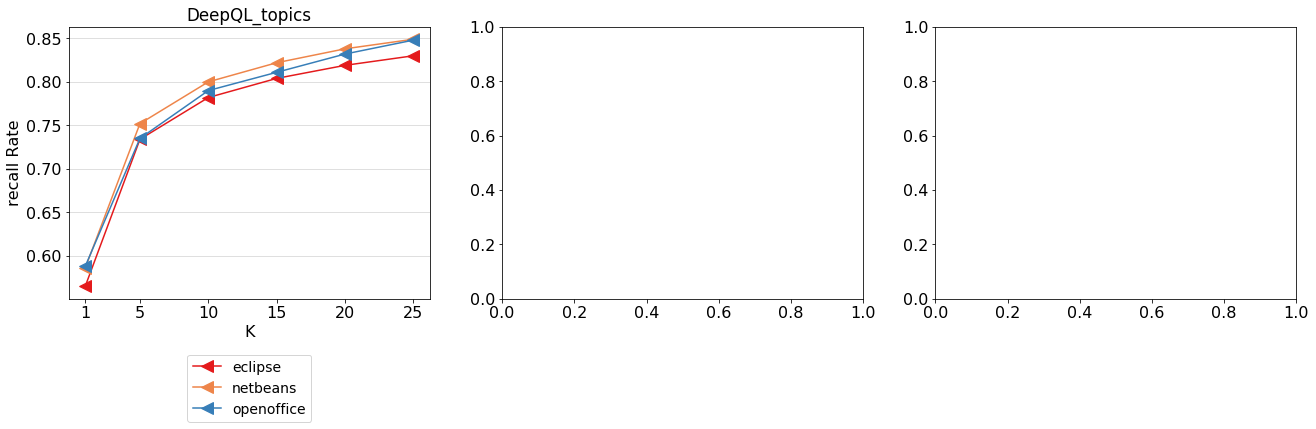

In [125]:
plot_retrieval_propose('recall', df_1000, aproachs=['DeepQL_topics'])

## 100 epochs

In [15]:
df_100 = df[df['epoch'] == '100']

### All methods

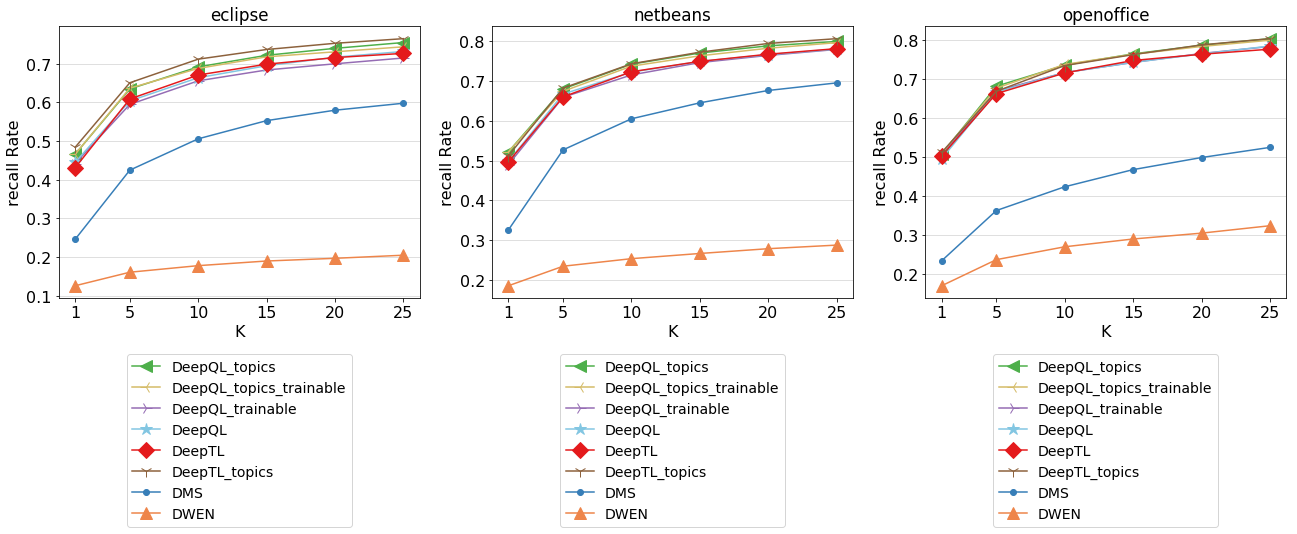

In [16]:
plot_retrieval('recall', df_100, 'retrieval_100')

## 1000 epochs

In [17]:
df_1000 = df[df['epoch'] == '1000']

## All methods

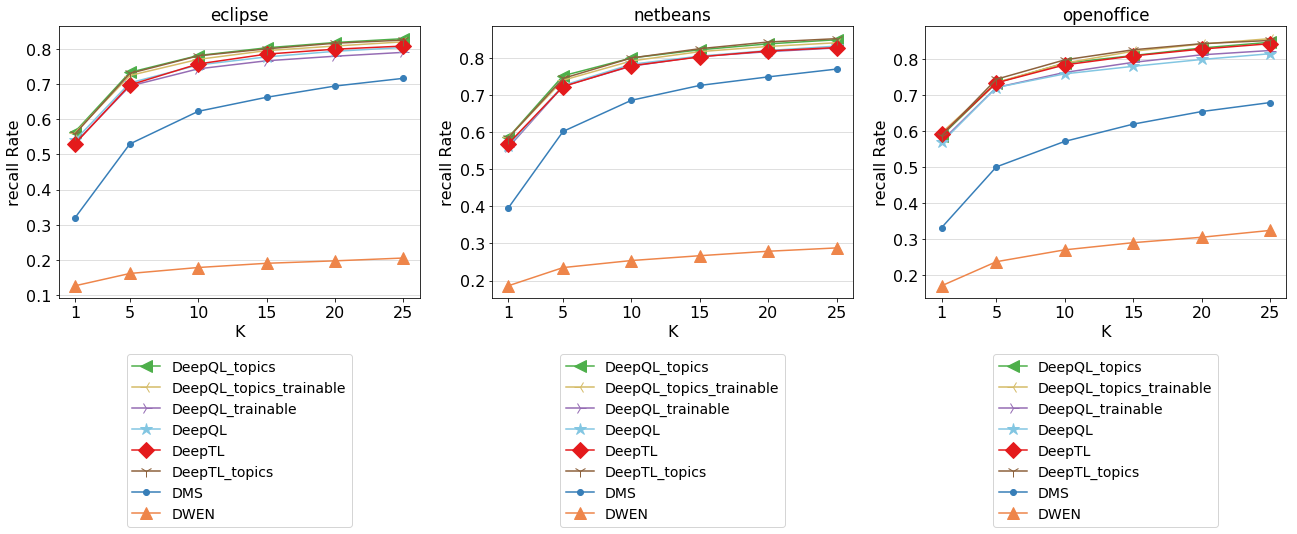

In [18]:
plot_retrieval('recall', df_1000, 'retrieval_1000')

## All baselines against best propose

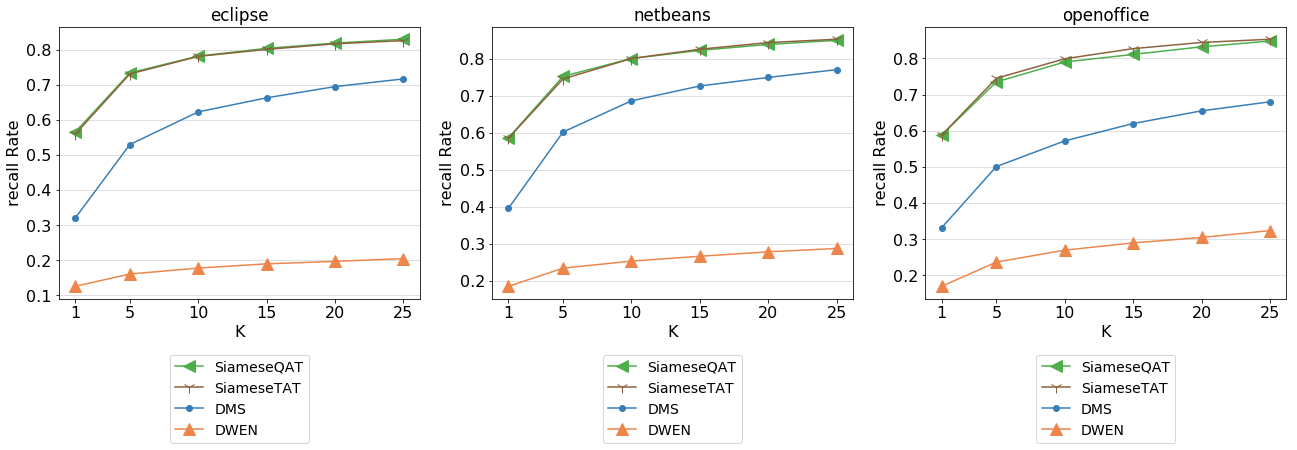

In [19]:
plot_retrieval('recall', df_1000, 'retrieval_1000_only_best_propose', ['DeepQL_topics', 'DeepTL_topics', 'DMS', 'DWEN'], 
               names={ "DeepQL_topics" : "SiameseQAT", "DeepTL_topics" : "SiameseTAT" })

### Only propose methods

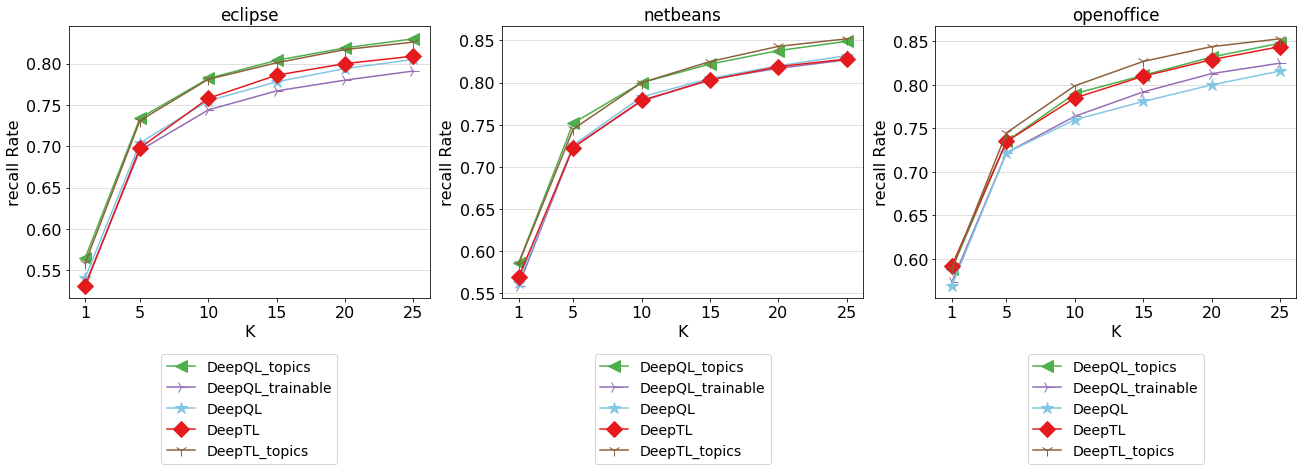

In [20]:
plot_retrieval('recall',  df_1000, 'retrieval_1000_only_proposes', ['DeepQL_topics', 'DeepQL_trainable', 
                                                                    'DeepQL', 'DeepTL', 'DeepTL_topics'])

In [21]:
df_1000[df_1000['domain'].isin(['eclipse'])]

,recall,precision,f_score,top@k,method,domain,epoch,symbol
144,0.320,0.320,0.320,1,DMS,eclipse,1000,.
145,0.530,0.151,0.235,5,DMS,eclipse,1000,.
146,0.623,0.100,0.172,10,DMS,eclipse,1000,.
147,0.663,0.076,0.136,15,DMS,eclipse,1000,.
148,0.695,0.063,0.116,20,DMS,eclipse,1000,.
149,0.717,0.054,0.100,25,DMS,eclipse,1000,.
150,0.126,0.126,0.126,1,DWEN,eclipse,1000,^
151,0.161,0.041,0.065,5,DWEN,eclipse,1000,^
152,0.178,0.024,0.042,10,DWEN,eclipse,1000,^
153,0.190,0.018,0.033,15,DWEN,eclipse,1000,^


## Combining rankings

Building a Ensemble retrieval

In [22]:
def read_rank(path):
    rank = []
    with open(path, 'r') as f:
        rank = f.read().split("\n")
        return rank

## Method A

In [23]:
'''
    deepQL_topics
    deepQL_no_trainable
    deepTL_topics
'''
method = 'baseline'
DIR = 'data/processed/{}/{}'.format(domains[2], 'bert')
path = os.path.join(DIR, '{}_{}_1000.txt'.format('exported_rank', method))
path

'data/processed/openoffice/bert/exported_rank_baseline_1000.txt'

In [24]:
rank_a = read_rank(path)

In [25]:
len(rank_a)

1923

In [26]:
rank_a[:1]

['49152:49146|38338:0.5744565427303314,54483:0.5539047718048096,61985:0.5354834198951721,61986:0.5354834198951721,46035:0.5312427878379822,50555:0.5310565829277039,76405:0.5307948291301727,71356:0.5303236246109009,29324:0.5292781293392181,83086:0.5280122756958008,23540:0.5252191424369812,22020:0.51735520362854,1636:0.514231413602829,18654:0.5133943557739258,40135:0.5130807757377625,28065:0.5042454600334167,80939:0.49739623069763184,23729:0.4972035884857178,72048:0.496685266494751,115094:0.4965834617614746,43617:0.49553680419921875,21240:0.4936909079551697,46642:0.4931991696357727,19975:0.4904545545578003,97231:0.4877593517303467,12052:0.48746031522750854,19431:0.48745590448379517,12284:0.4843594431877136,28593:0.4807646870613098']

## Method B

In [27]:
'''
    deepQL_no_trainable
    deepTL_topics
    baseline
'''
method = 'deepTL_topics'
DIR = 'data/processed/{}/{}'.format(domains[2], 'bert')
path = os.path.join(DIR, '{}_{}_1000.txt'.format('exported_rank', method))
path

'data/processed/openoffice/bert/exported_rank_deepTL_topics_1000.txt'

In [28]:
rank_b = read_rank(path)

In [29]:
len(rank_b)

1923

In [30]:
rank_b[:1]

['49152:49146|46035:0.59761643409729,79344:0.5896034836769104,67539:0.5862015783786774,30133:0.5858075022697449,83001:0.5845732092857361,73301:0.5818209648132324,55335:0.5809078812599182,80068:0.5807275772094727,65860:0.5769025087356567,97139:0.5763945281505585,53192:0.575126051902771,51035:0.5744416415691376,55322:0.5727066397666931,72208:0.5718405842781067,73749:0.5717874467372894,73750:0.5717874467372894,14416:0.5716788470745087,73382:0.5714815258979797,62531:0.5714132487773895,22184:0.5698128044605255,111617:0.56859490275383,60139:0.5678898990154266,27885:0.5659041106700897,5944:0.5656470060348511,30746:0.565487802028656,46819:0.5648220479488373,45105:0.5646779537200928,77962:0.5646704733371735,60586:0.564409613609314']

In [31]:
def split_rank(row):
    try:
        query, result = row.split("|")
        dups = result.split(",")
        return query, result, dups
    except:
        #print("Tried to split row = {}".format(row))
        return None, None, None

rank_ensemble = []

for row_a, row_b in zip(rank_a, rank_b):
    
    query_a, result_a, dups_a = split_rank(row_a)
    query_b, result_b, dups_b = split_rank(row_b)
    
    if query_a is None:
        continue
    
    dup_set = {}
    # Rank A
    dups_a_rank_list = [ (r.split(":")[0], float(r.split(":")[1])) for r in dups_a ]
    dups_a_rank = dict( (r.split(":")[0], float(r.split(":")[1])) for r in dups_a)
    dup_set.update(dups_a_rank)
    # Rank B
    dups_b_rank = [ (r.split(":")[0], float(r.split(":")[1])) for r in dups_b ]
    # Dot (Does not work well, minimized great examples in the first position)
    #dups_b_rank = dict( (bug, dup_set[bug] * sim) if bug in dup_set else (bug, sim) for bug, sim in dups_b_rank )
    # Voting majority maximum probability
    dups_b_rank = dict( (bug_a[0], bug_a[1]) if bug_a[1] > bug_b[1] else (bug_b[0], bug_b[1]) \
                       for bug_a, bug_b in zip(dups_a_rank_list, dups_b_rank) )
    dup_set.update(dups_b_rank)
    
    # Reorder rank according the new similarity
    dup_set = [ (key, dup_set[key]) for key in dup_set ]
    dup_set = sorted(dup_set, key=lambda x : x[1])[::-1]
    # Format rank
    rank_formated = [ '{}:{}'.format(r[0], r[1]) for r in dup_set ]
    rank_formated = ",".join(rank_formated)
    rank_ensemble.append( "{}|{}".format(query_a, rank_formated) )
#dup_set, len(dup_set)
len(rank_ensemble)

1922

In [32]:
Evaluation(0).evaluate(rank_ensemble)

{'0 - recall_at_1': 0.516,
 '1 - recall_at_5': 0.67,
 '2 - recall_at_10': 0.725,
 '3 - recall_at_15': 0.758,
 '4 - recall_at_20': 0.776,
 '5 - recall_at_25': 0.785}

## Cluster Evaluation

In [92]:
data_clusters = []
for domain in domains:
    PREPROCESSING = 'bert'
    DIR = 'data/processed/{}/{}'.format(domain, PREPROCESSING)
    for method in methods['1000']:
        CLUSTER_PATH = 'cluster_{}.pkl'.format(method)
        try:
            with open(os.path.join(DIR, CLUSTER_PATH), 'rb') as f:
                data = pickle.load(f)
                data['domain'] = domain
                data_clusters.append(data)
        except:
            continue
df_clusters = pd.DataFrame(data_clusters)
df_clusters[df_clusters['domain'] == 'openoffice']

,clusters,domain,method,silhouette
16,630,openoffice,baseline_1000,-0.031961
17,630,openoffice,baseline_dwen_1000,-0.371439
18,630,openoffice,deepQL_topics_1000,0.066004
19,630,openoffice,deepQL_topics_trainable_1000,0.064361
20,630,openoffice,deepQL_trainable_1000,0.064085
21,630,openoffice,deepQL_no_trainable_1000,0.064390
22,630,openoffice,deepTL_1000,0.065931
23,630,openoffice,deepTL_topics_1000,0.068290


In [130]:
df_clusters.to_csv('cluster_report.csv', index=False)

In [197]:
report_cluster = df_clusters.transpose()

report_cluster

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
clusters,2323,2323,2323,2323,2323,2323,2323,2323,1915,1915,...,1915,1915,630,630,630,630,630,630,630,630
domain,eclipse,eclipse,eclipse,eclipse,eclipse,eclipse,eclipse,eclipse,netbeans,netbeans,...,netbeans,netbeans,openoffice,openoffice,openoffice,openoffice,openoffice,openoffice,openoffice,openoffice
method,baseline_1000,baseline_dwen_1000,deepQL_topics_1000,deepQL_topics_trainable_1000,deepQL_trainable_1000,deepQL_no_trainable_1000,deepTL_1000,deepTL_topics_1000,baseline_1000,baseline_dwen_1000,...,deepTL_1000,deepTL_topics_1000,baseline_1000,baseline_dwen_1000,deepQL_topics_1000,deepQL_topics_trainable_1000,deepQL_trainable_1000,deepQL_no_trainable_1000,deepTL_1000,deepTL_topics_1000
silhouette,-0.0310707,-0.308706,0.0815334,0.0813752,0.0761875,0.076537,0.0747341,0.0819396,-0.015122,-0.342231,...,0.0926155,0.0977795,-0.0319608,-0.371439,0.0660041,0.0643606,0.0640849,0.0643902,0.065931,0.0682899


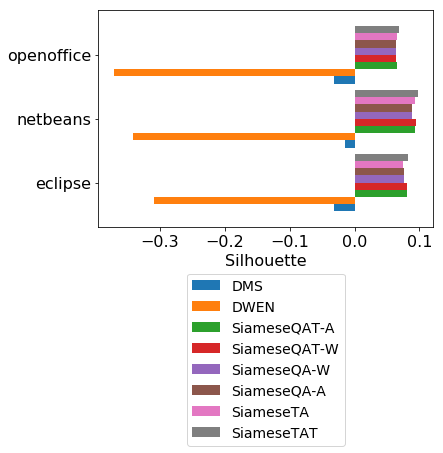

In [215]:

methods_score = report_cluster.loc['method'][:8]
methods_score = [authors[method] for method in methods_score]
methods_score = [friendly_names[method] for method in methods_score]
eclipse_score = report_cluster.loc['silhouette'][:8]
netbeans_score = report_cluster.loc['silhouette'][8:16]
openoffice_score = report_cluster.loc['silhouette'][16:24]

acc = np.concatenate([[eclipse_score], [netbeans_score], [openoffice_score]], 0)

df_score = pd.DataFrame(acc, columns=methods_score, index=domains)

ax = df_score.plot.barh(width=0.9)
ax.set_xlabel("Silhouette")
ax.set_yticklabels(domains, rotation = 0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))
fig = ax.get_figure()
fig.savefig('{}.png'.format('cluster_score'), bbox_inches="tight")

## Loss evaluation

In [34]:
import _pickle as pickle

def load_loss(method, base):
    loss_dir = 'data/processed/{}/{}'.format(base, 'bert')
    loss_dir = os.path.join(loss_dir,'{}_log.pkl'.format(method))

    with open(loss_dir, 'rb') as f:
        loss = pickle.load(f)
    return loss

In [35]:
 def validation_loss(loss, val_loss):
        plt.plot(loss, label='loss')
        plt.plot(val_loss, label='val_loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
def validation_loss_grid(loss, val_loss, name, lines, col, index):
        ax = plt.subplot(lines, col, index)
        plt.plot(loss, label='loss')
        plt.plot(val_loss, label='val_loss')
        plt.title(name)
        plt.ylabel('loss')
        plt.xlabel('epoch')
        if(index == 1 or (index % col == 1)):
            plt.legend(['train', 'validation'], bbox_to_anchor=(-1.05, 1.0), loc='upper left')
        plt.grid(True)
        return ax

In [36]:
def plot_loss(base, epochs, limit_epochs=1000):

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(22, 22))

    index_grid = 1
    for row, model in enumerate(['deepQL_no_trainable_{}'.format(epochs),
                                 'deepQL_topics_{}'.format(epochs),
                                 'deepQL_trainable_{}'.format(epochs),
                                 'deepQL_topics_trainable_{}'.format(epochs),
                                 'baseline_{}'.format(epochs),
                                 'DMS_QL_{}'.format(epochs), 
                                 'DWEN_QL_{}'.format(epochs),
                                'deepTL_{}'.format(epochs),
                               'deepTL_topics_{}'.format(epochs)]):
        try:
            ql_loss = load_loss(model, base)
            for _, (loss_name, index) in enumerate(zip(['loss', 'Q1', 'Q2', 'Q3', 'Q4'], [0, 5, 6, 7, 8])):
                try:
                    train = [r[index] for r in ql_loss['train']][:limit_epochs]
                    test = [r[index] for r in ql_loss['test']][:limit_epochs]
                    ax_r = validation_loss_grid(train, test, loss_name, n_rows, n_cols, index_grid)
                    if(index_grid == 1 or (index_grid % n_cols == 1)):
                        ax = ax_r
                except: pass
                index_grid+=1
            
            plt.text(0, 1.5, model,
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform=ax.transAxes,
                 fontsize=20)
        except:
            pass


    plt.subplots_adjust(hspace=1.25,
                        wspace=0.35)
    plt.show()

In [37]:
n_rows = 9
n_cols = 5
limit_epochs = 200
epochs = 1000

In [38]:
import numpy as np

np.asarray([[1]]).shape, np.asarray([[.5]]).shape
#np.asarray([[1]]) * np.asarray([[.5]])

((1, 1), (1, 1))

### Eclipse 

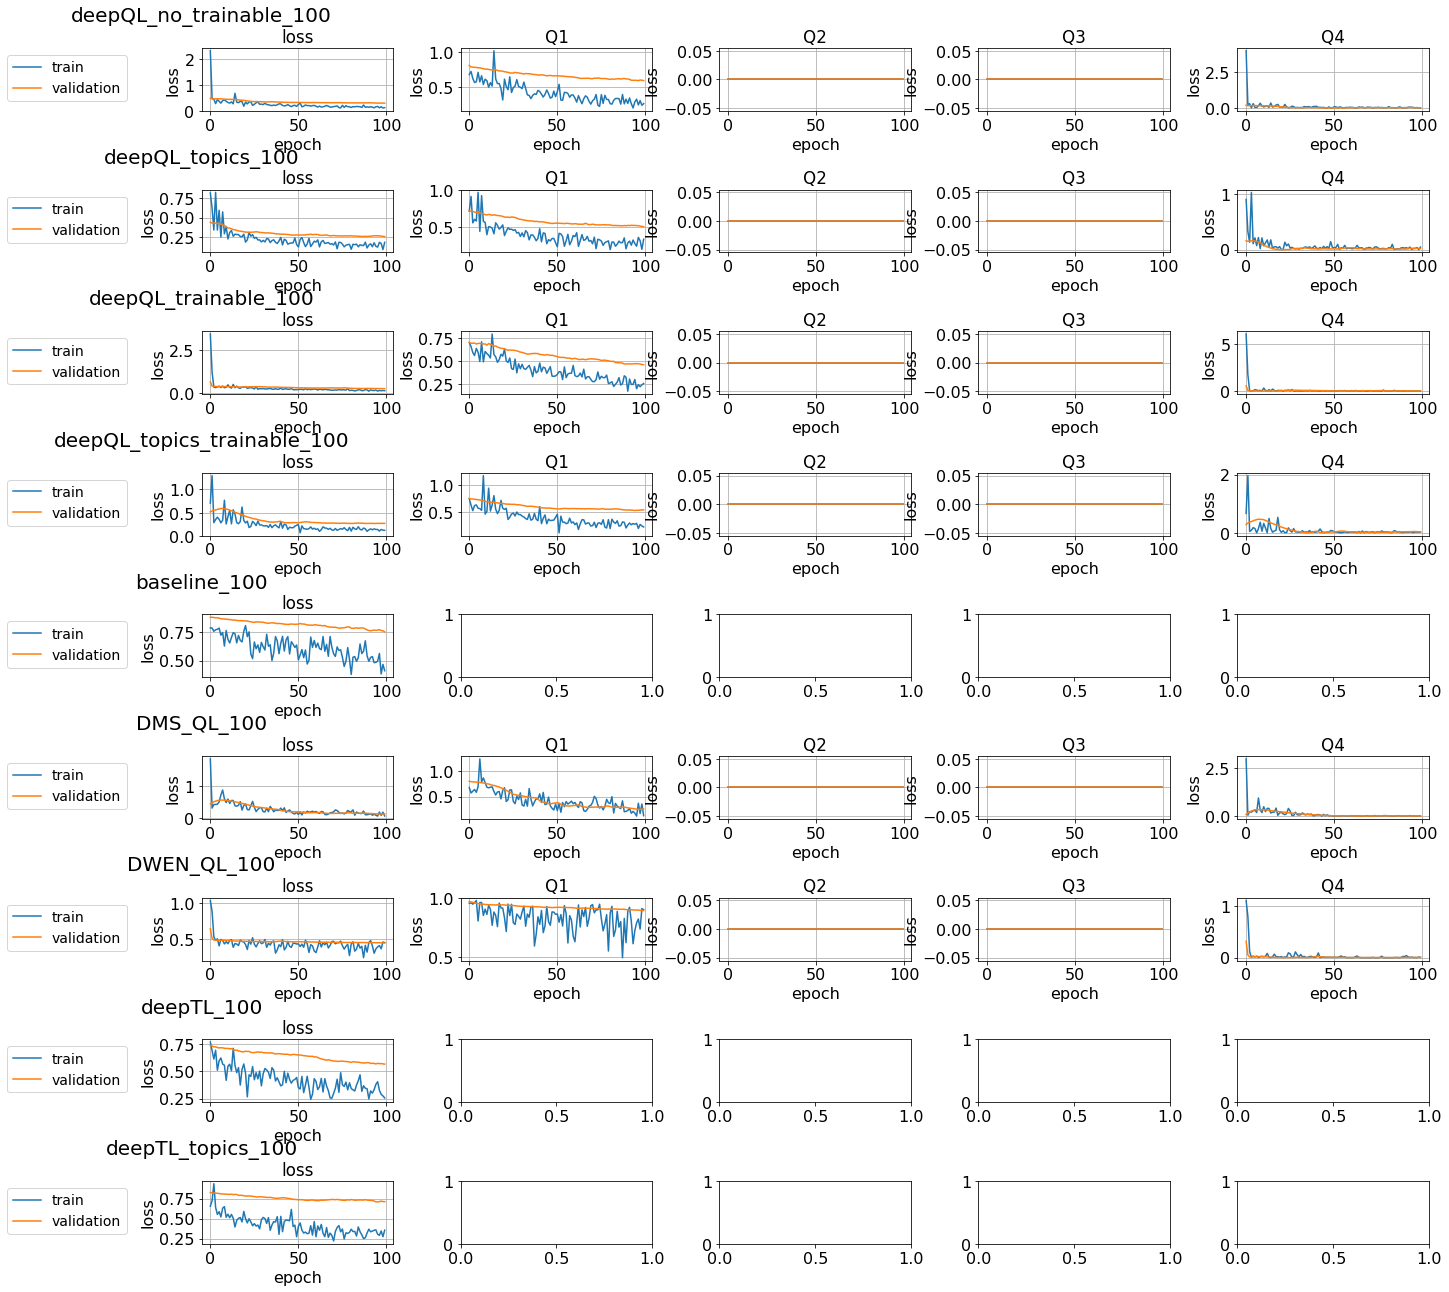

In [39]:
plot_loss('eclipse', 100, limit_epochs=100)

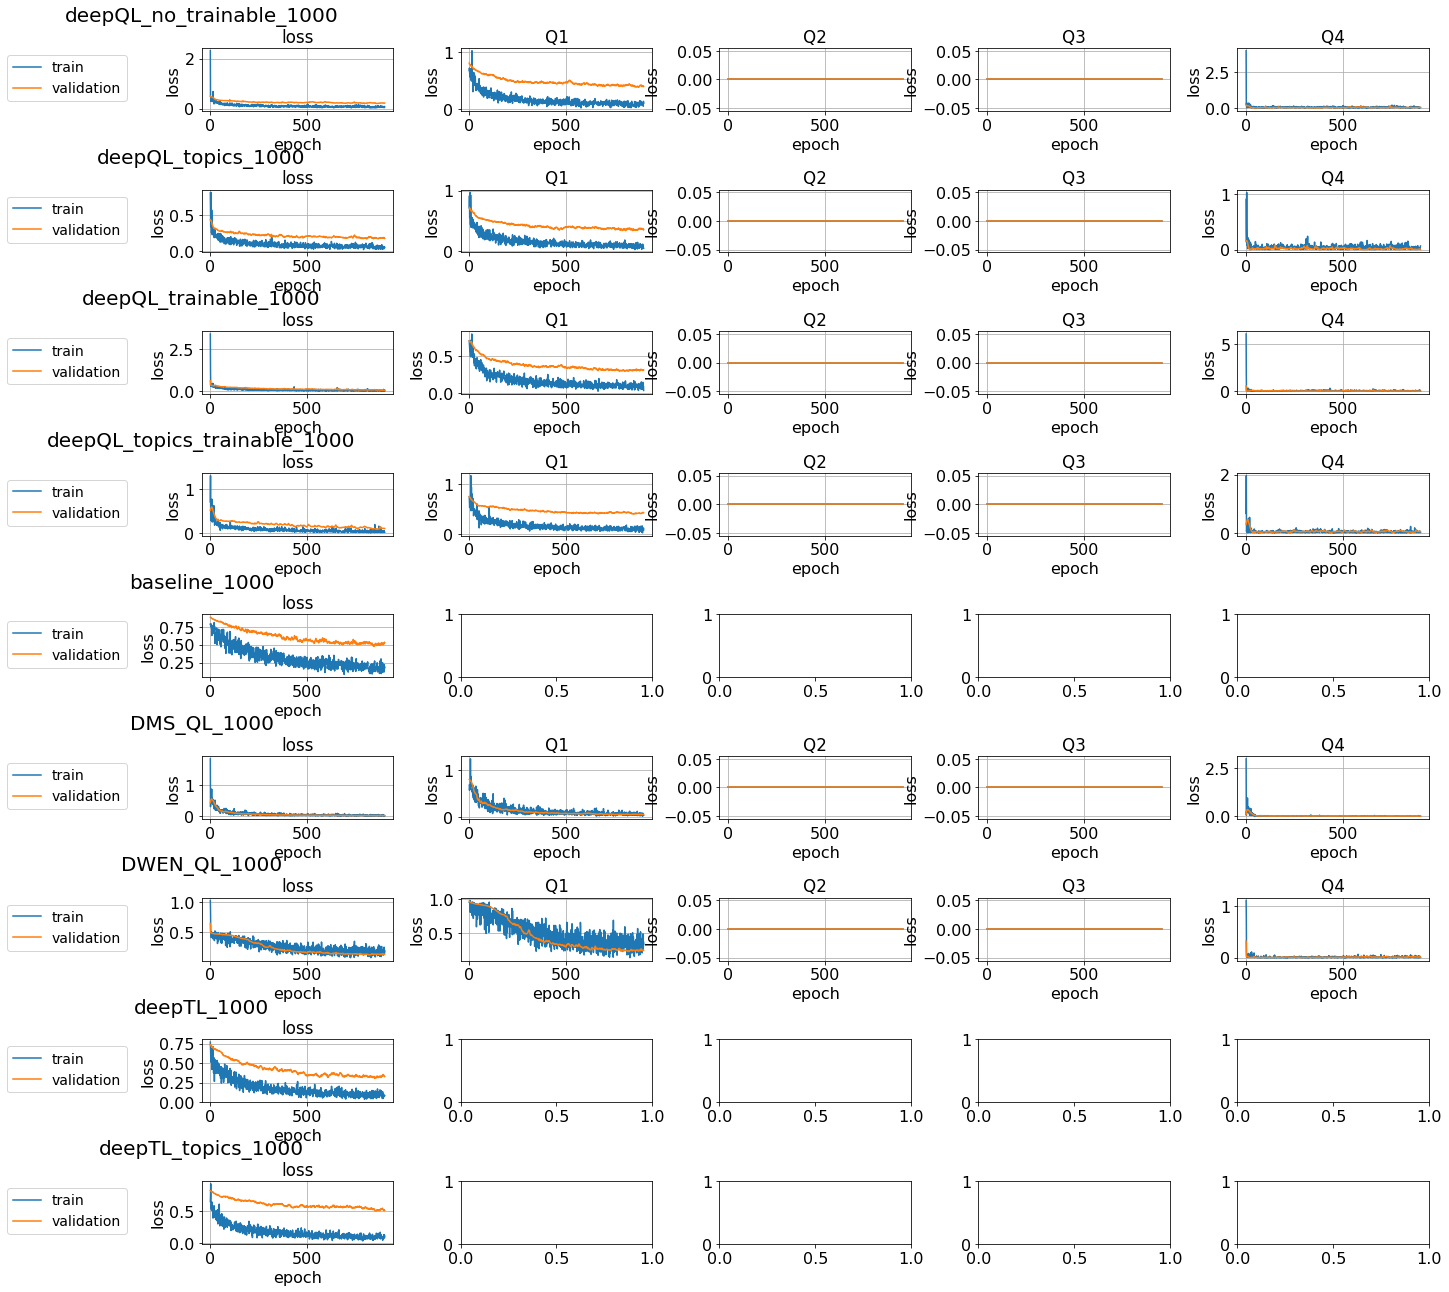

In [40]:
plot_loss('eclipse', 1000)

### Netbeans

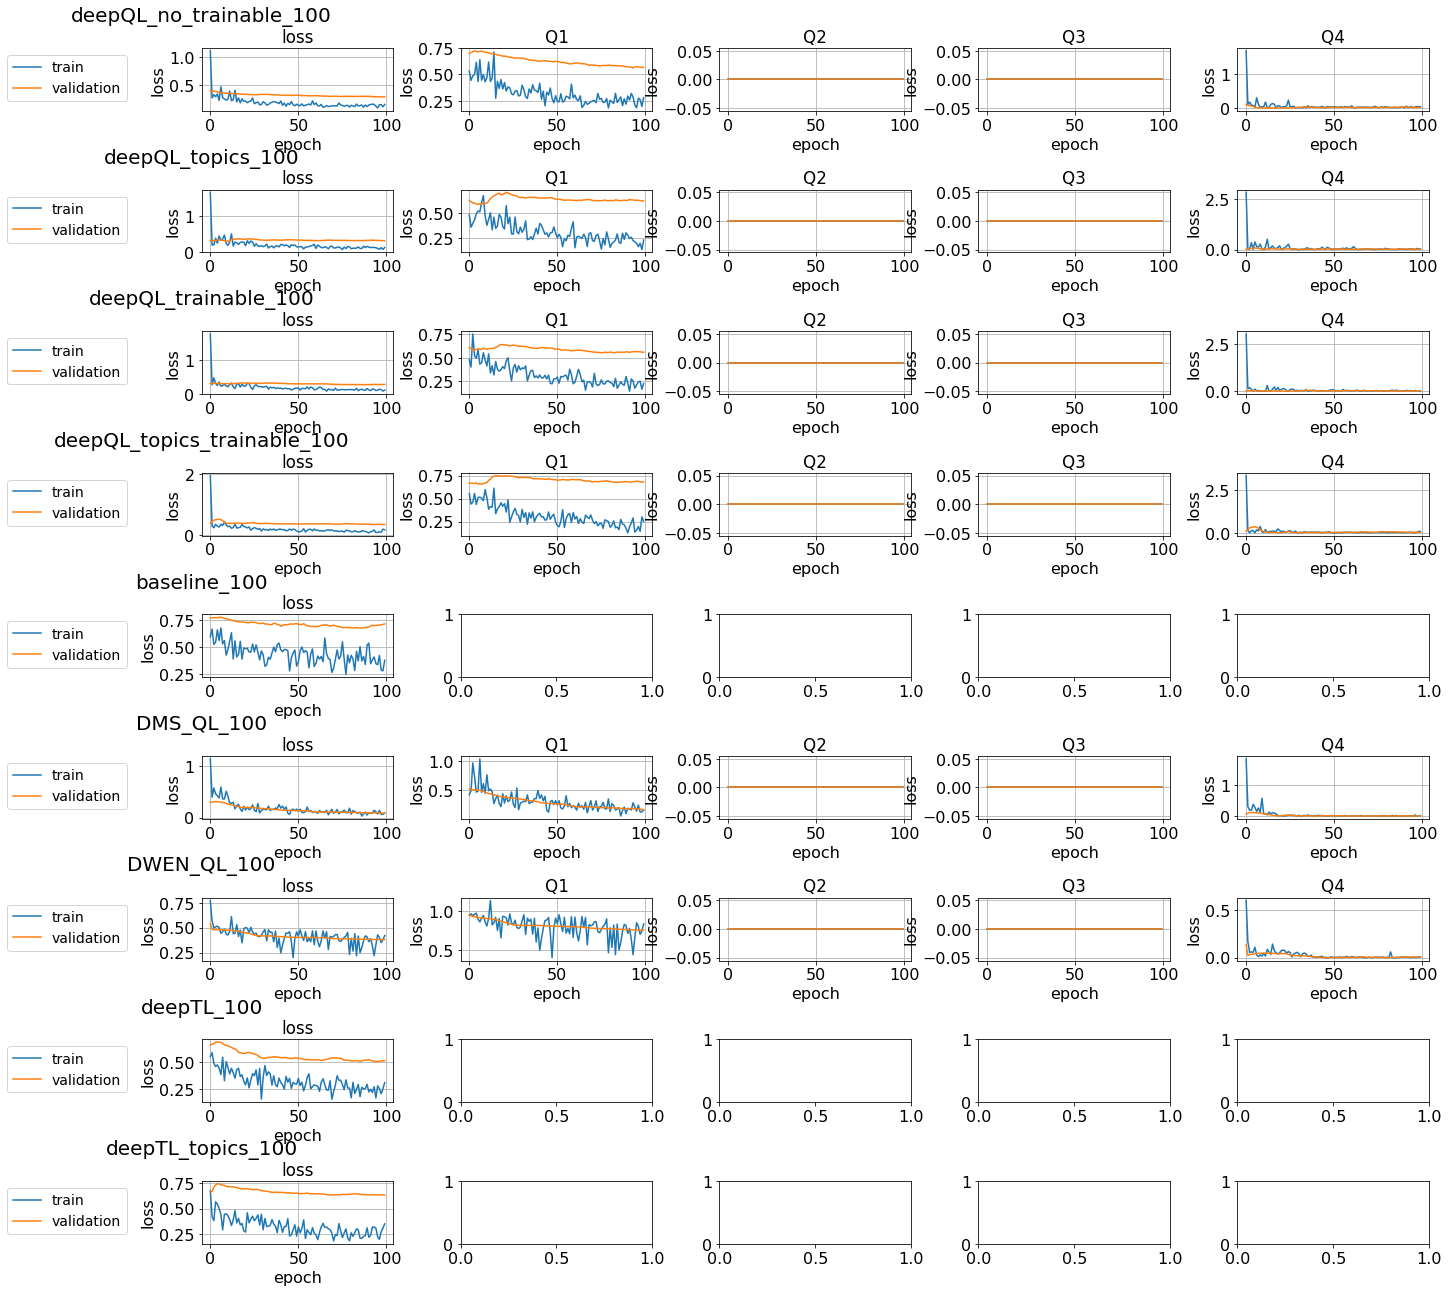

In [41]:
plot_loss('netbeans', 100, limit_epochs=100)

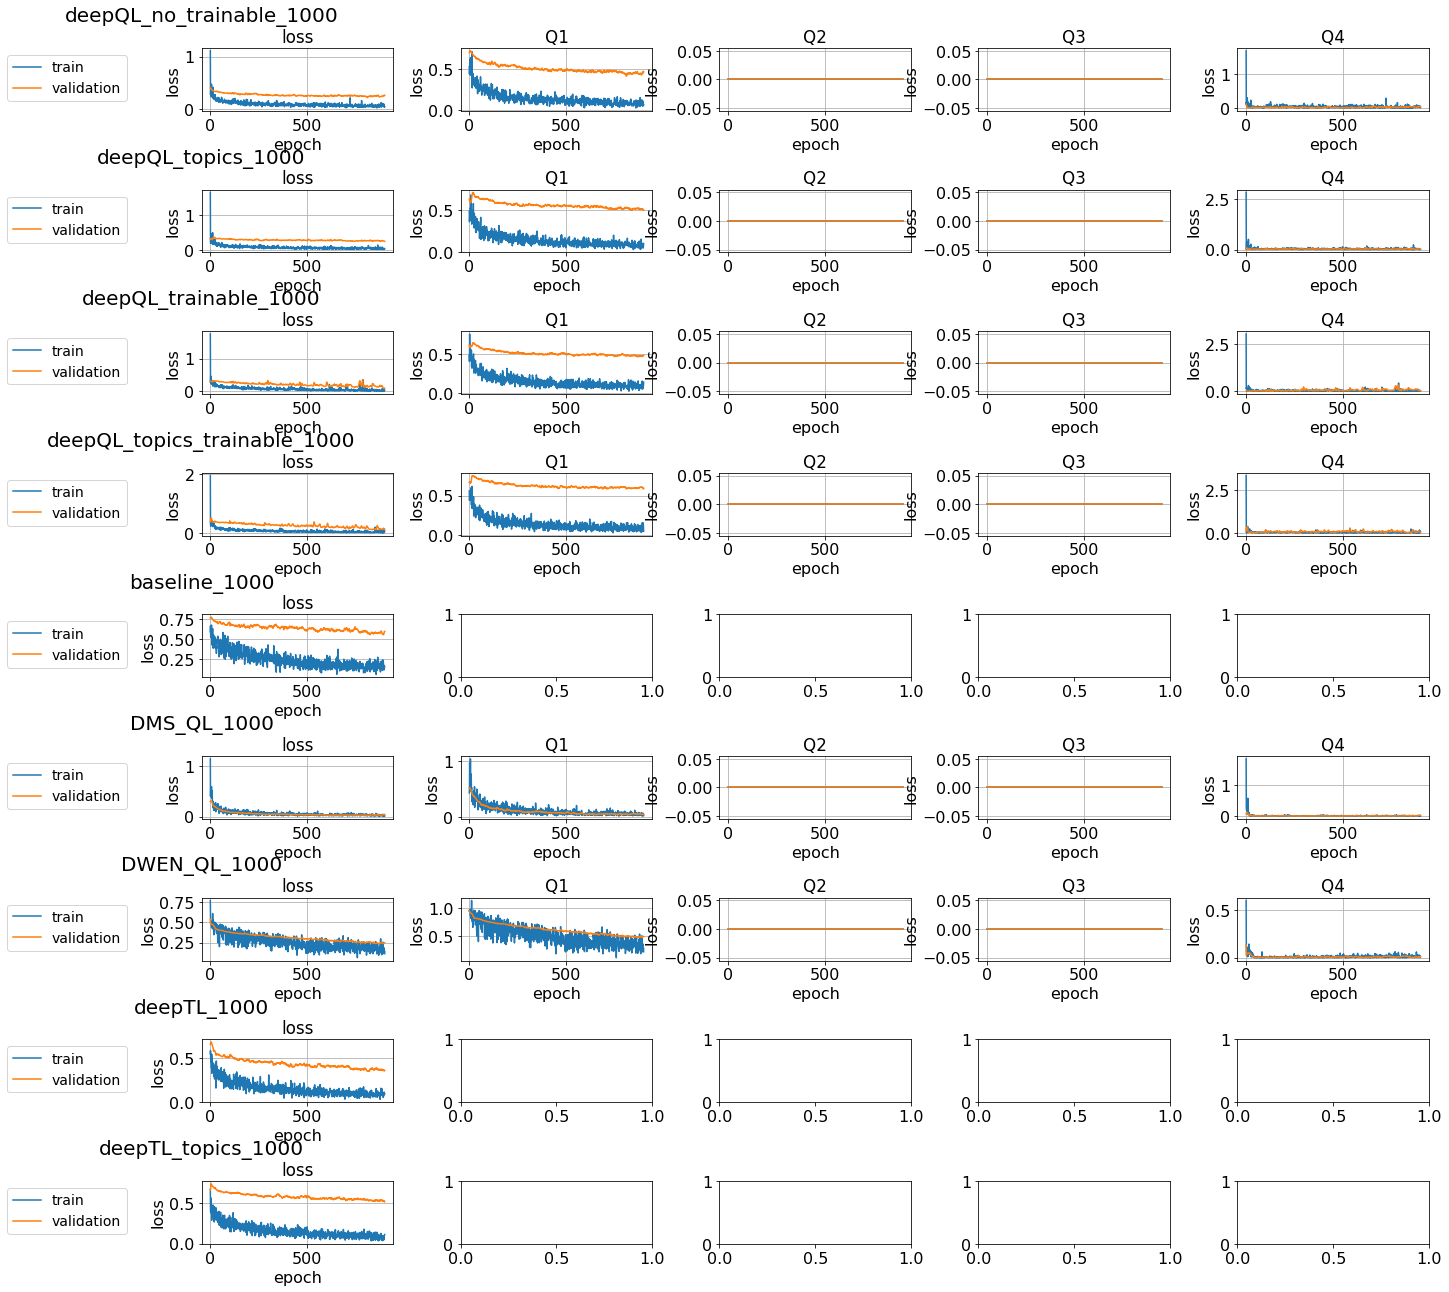

In [42]:
plot_loss('netbeans', epochs)

### Open Office

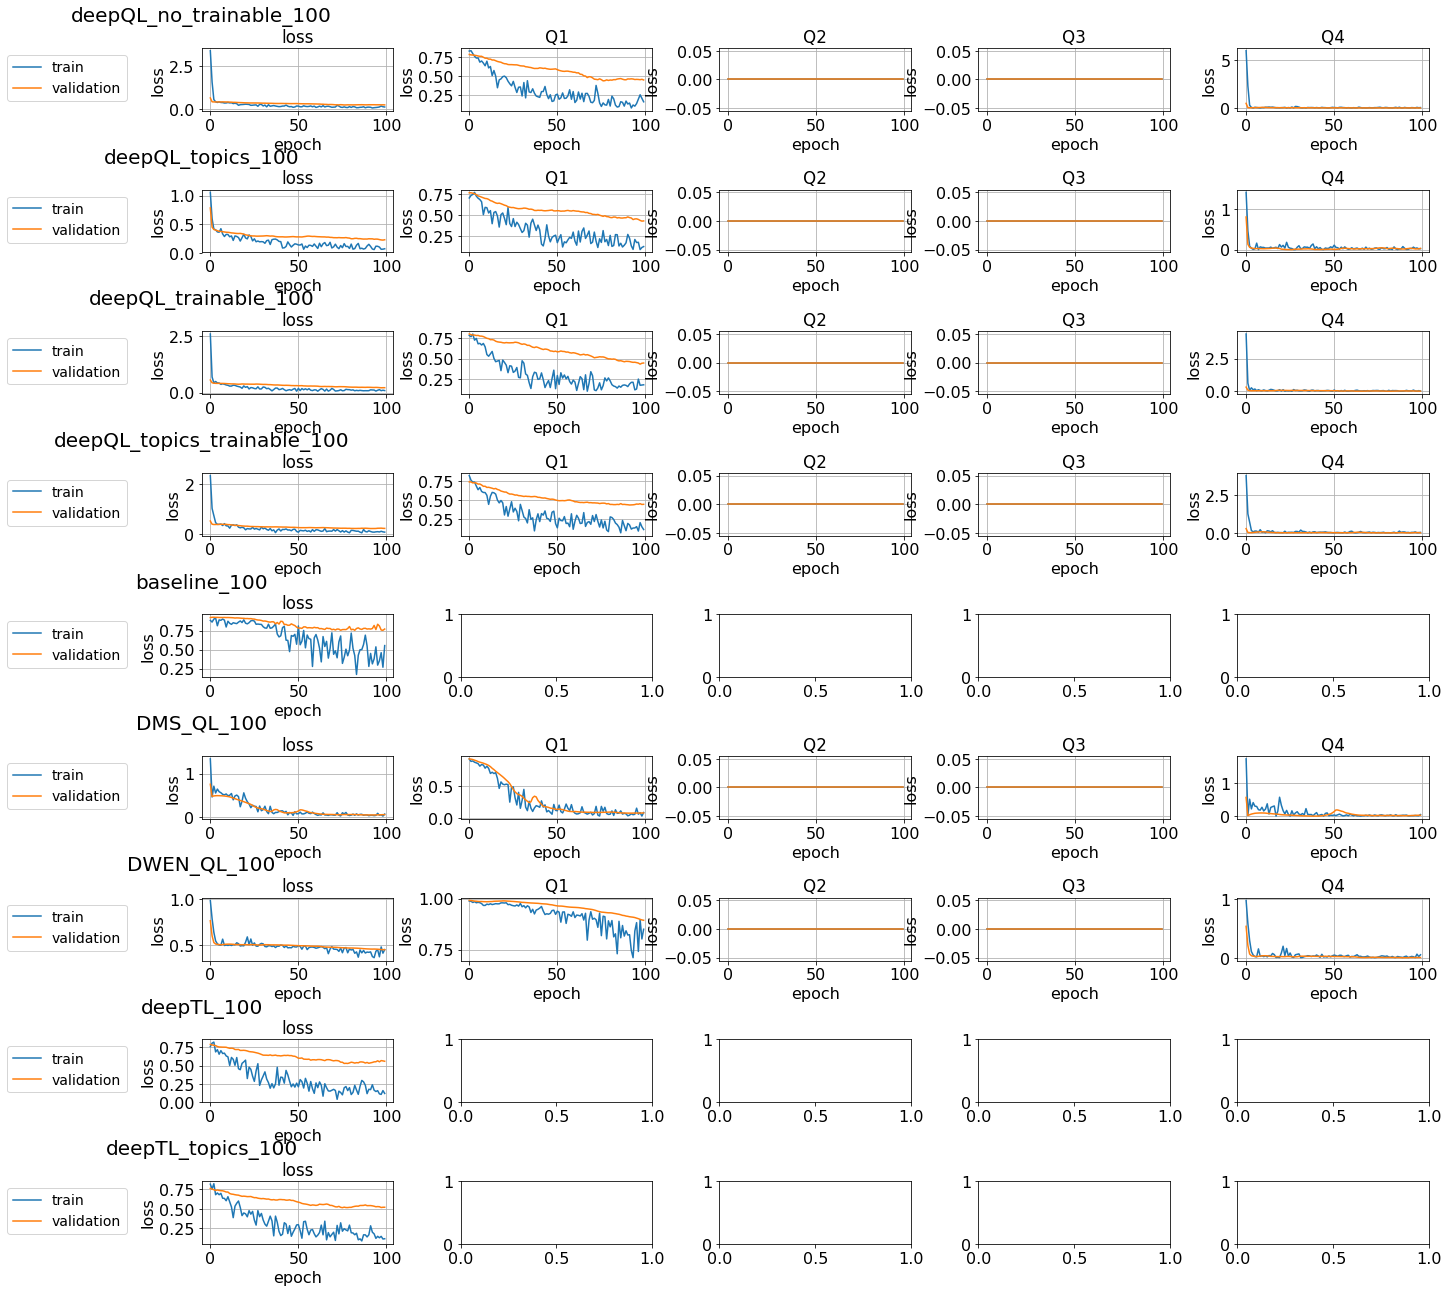

In [43]:
plot_loss('openoffice', 100, limit_epochs=100)

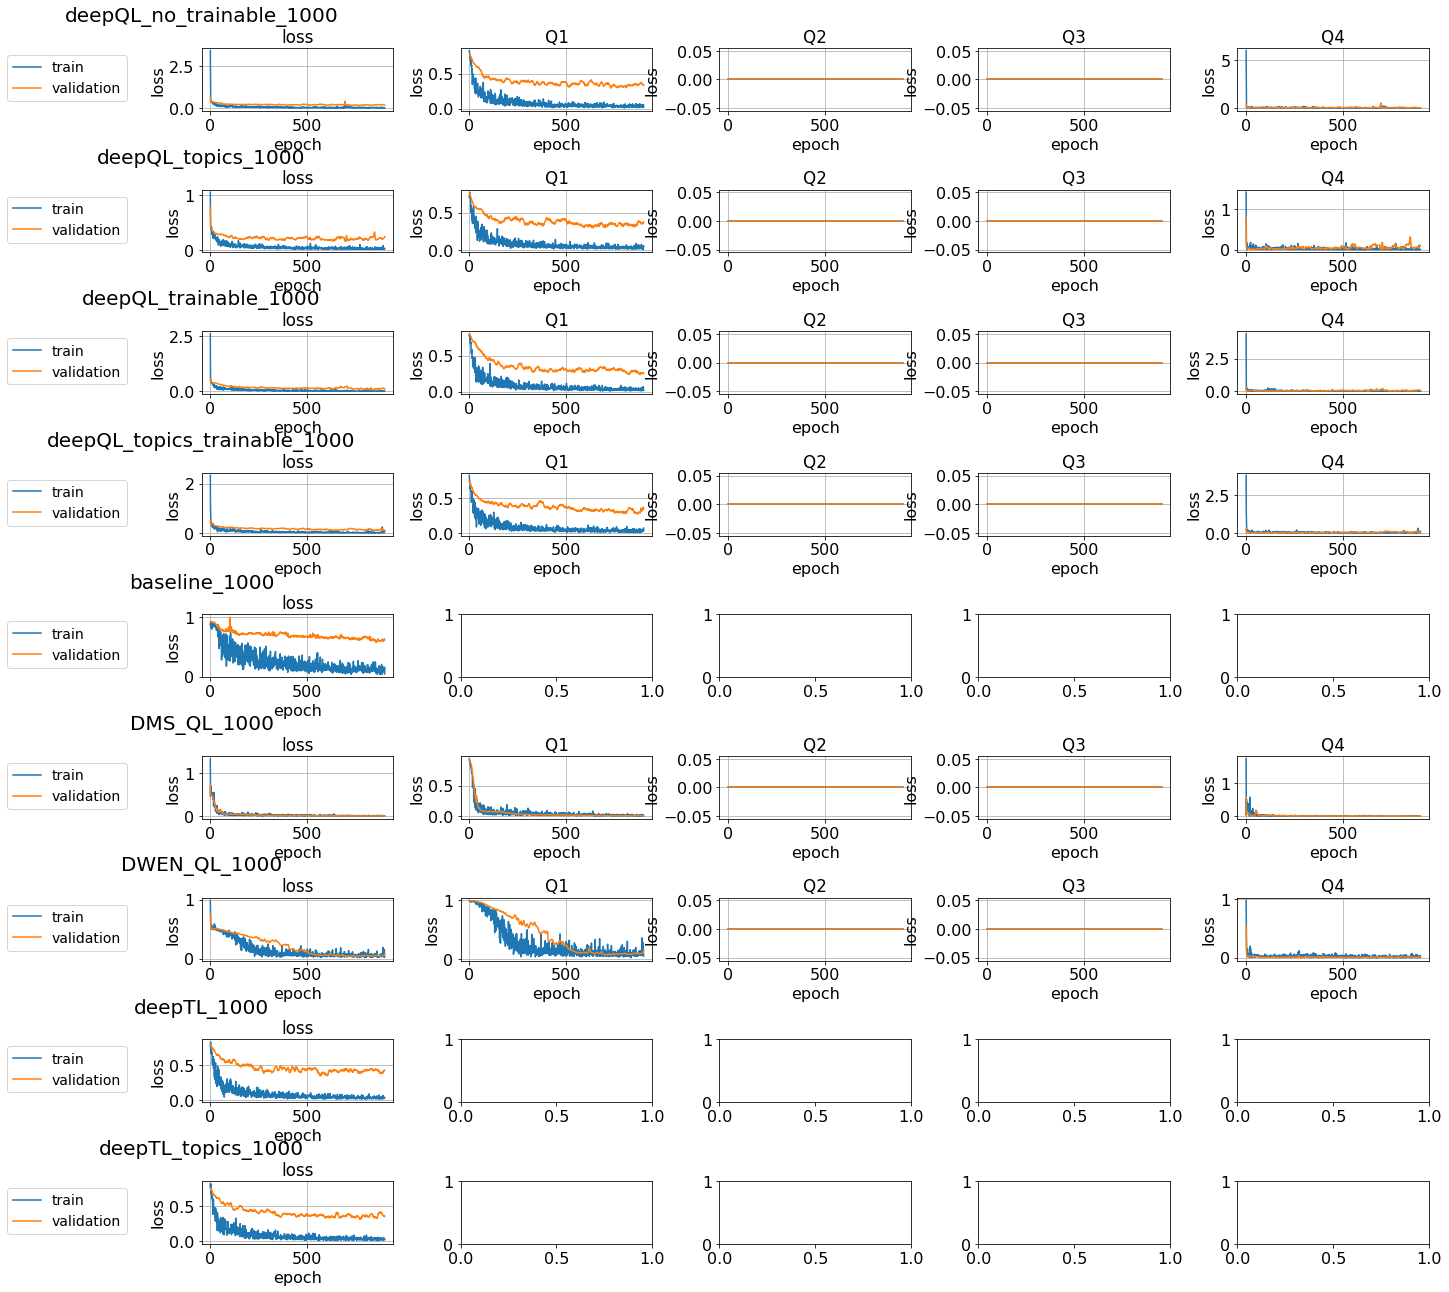

In [44]:
plot_loss('openoffice', 1000)

### How TL is the most important during the learning?

Count how many time a model choiced a loss as the most important loss.

In [45]:
'''
    deepQL_weights_1000
    deepQL_trainable_1000
    deepQL_topics_1000
    DMS_QL_1000
    DWEN_QL_1000
    deepTL_100
'''
DOMAIN_LOSS = 'openoffice'
MODEL_LOSS = 'deepQL_trainable_1000'
loss_data = load_loss(MODEL_LOSS, DOMAIN_LOSS)

In [46]:
import numpy as np
import collections

train = loss_data['train']
test = loss_data['test']

w_name = {
    0 : 'Q1',
    1 : 'Q2',
    2 : 'Q3',
    3 : 'Q4'
}

def high_importance(w):
    index = np.argmax(w, axis=0)
    return w_name[index]
def low_importance(w):
    index = np.argmin(w, axis=0)
    return w_name[index]
def equal_importance(w):
    c = collections.Counter(w)
    c = [r[0] for r in c.most_common(4) if r[1] > 1]
    def get_name(arr):
        name = [w_name[e] for e in arr]
        return ",".join(name)
    names = [get_name(np.where(np.asarray(w) == e)[0]) for e in c]
    return ",".join(names) if len(names) > 0 else "none"

loss_status = { 'train' : {}, 'test' : {} }
for data, phase in zip([train, test], ['train', 'test']):
    loss_status[phase]['high'] = [high_importance(r[1:5]) for r in data]
    loss_status[phase]['low'] = [low_importance(r[1:5]) for r in data]
    loss_status[phase]['equal'] = [equal_importance(r[1:5]) for r in data]

loss_status.keys()

dict_keys(['train', 'test'])

In [47]:
q1 = np.asarray([ r[1] for i, r in enumerate(loss_data['test']) ])
q2 = np.asarray([ r[4] for i, r in enumerate(loss_data['test']) ])
epochs_range = np.asarray(list(range(len(q1)))) + 1
q1_label = np.asarray(['Q1'] * len(q1))
q2_label = np.asarray(['Q2'] * len(q2))

data = np.concatenate([q1, q2])
data_label = np.concatenate([q1_label, q2_label])
data_epochs = np.concatenate([epochs_range, epochs_range])
# data = np.concatenate([data.reshape(-1, 1), data_label.reshape(-1, 1), data_epochs.reshape(-1, 1)], 1)
# data

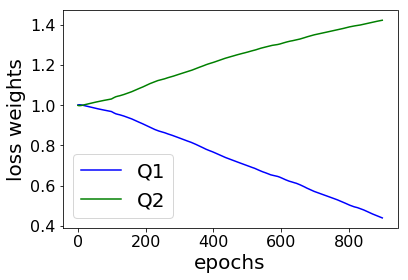

In [48]:
plt.plot(q1, label='Q1', color='blue')
plt.plot(q2, label='Q2', color='green')
plt.xlabel('epochs', fontsize=20)
plt.ylabel('loss weights', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('resultados/loss_weights_{}_{}.png'.format(MODEL_LOSS, DOMAIN_LOSS), bbox_inches="tight")
plt.show()

In [49]:
import matplotlib.pyplot as plt

def summary_loss(loss_status, phase, index, index_name):
    data = [ np.concatenate([[loss_status[phase]['high'][take_epoch], loss_status[phase]['low'][take_epoch], 
                              loss_status[phase]['equal'][take_epoch]],
                            train[take_epoch][1:5]])
            for take_epoch in index]
    index = ["{} epoch(s)".format(n) for n in index_name]
    return pd.DataFrame(data=data, columns=['high', 'low', 'equal', 'Q1', 'Q2', 'Q3', 'Q4'], index=index)

def plot_importance(loss_status, phase, list_importance):
    data = []
    for importance in list_importance:
        name = '{}_importance'.format(importance)
        stats_loss = pd.DataFrame(data=loss_status[phase][importance], columns=[name])
        n_rows = stats_loss.shape[0]
        stats_loss = stats_loss.groupby(by=[name]).agg(arg=name).count().to_frame()
        stats_loss[name] = stats_loss[name] / n_rows
        stats_loss['importance'] = importance
        data.append(stats_loss)
    merged = pd.concat(data, sort=True)
    plt.figure();
    merged.plot.bar(by='importance')

#### Summarize loss importance on train at 1, 10, 100 and 1000 epochs

In [50]:
index = [0, 9, 99, 899]
index_name = [1, 10, 100, 1000]
phase = 'train'
summary_loss(loss_status, phase, index, index_name)

,high,low,equal,Q1,Q2,Q3,Q4
1 epoch(s),Q1,Q1,"Q1,Q2,Q3,Q4",1.0,1.0,1.0,1.0
10 epoch(s),Q1,Q4,"Q2,Q3",1.0018736,1.0,1.0,0.99813426
100 epoch(s),Q4,Q1,"Q2,Q3",0.9688083,1.0,1.0,1.0305237
1000 epoch(s),Q4,Q1,"Q2,Q3",0.440411,1.0,1.0,1.421944


<Figure size 432x288 with 0 Axes>

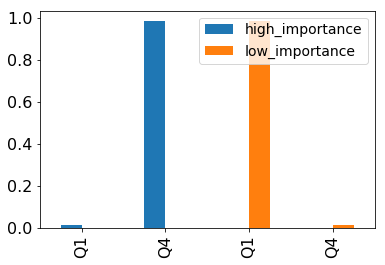

In [51]:
plot_importance(loss_status, phase, ['high', 'low'])

#### Summarize loss importance on test at 1, 10, 100 and 1000 epochs

In [52]:
index = [0, 9, 99, 899]
index_name = [1, 10, 100, 1000]
phase = 'test'
summary_loss(loss_status, phase, index, index_name)

,high,low,equal,Q1,Q2,Q3,Q4
1 epoch(s),Q1,Q4,"Q2,Q3",1.0,1.0,1.0,1.0
10 epoch(s),Q1,Q4,"Q2,Q3",1.0018736,1.0,1.0,0.99813426
100 epoch(s),Q4,Q1,"Q2,Q3",0.9688083,1.0,1.0,1.0305237
1000 epoch(s),Q4,Q1,"Q2,Q3",0.440411,1.0,1.0,1.421944


<Figure size 432x288 with 0 Axes>

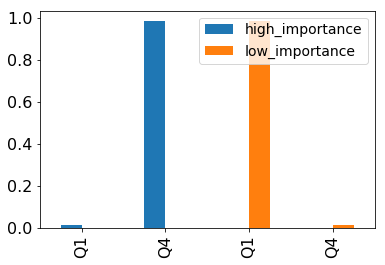

In [53]:
plot_importance(loss_status, phase, ['high', 'low'])

### Visualize indivual loss for a model

In [54]:
'''
    deepQL_weights_1000
    deepQL_trainable_1000
    DMS_QL_1000
    DWEN_QL_1000
    deepTL_100
'''
ql_loss = load_loss('deepQL_weights_1000', 'openoffice')

In [55]:
len(ql_loss['train'])

900

#### Triplet Loss with weights

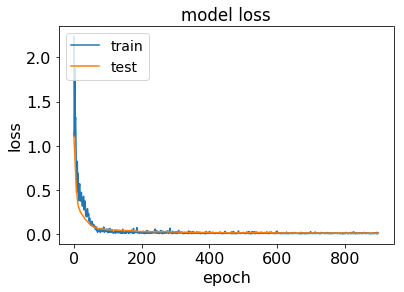

In [56]:
train = [r[0] for r in ql_loss['train']]
test = [r[0] for r in ql_loss['test']]
validation_loss(train, test)

#### Triplet loss

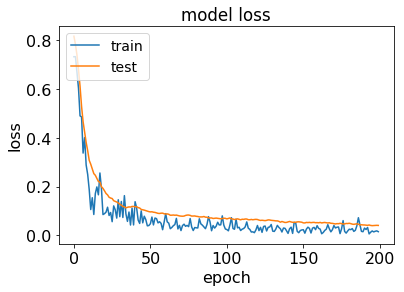

In [57]:
train = [r[5] for r in ql_loss['train']][:limit_epochs]
test = [r[5] for r in ql_loss['test']][:limit_epochs]

validation_loss(train, test)

#### Triplet loss pos

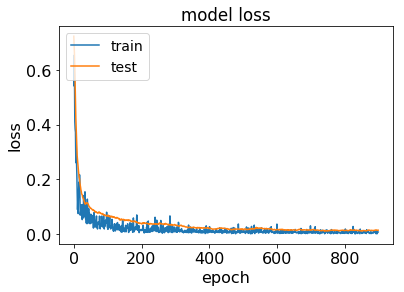

In [58]:
train = [r[6] for r in ql_loss['train']]
test = [r[6] for r in ql_loss['test']]

validation_loss(train, test)

#### Triplet loss neg

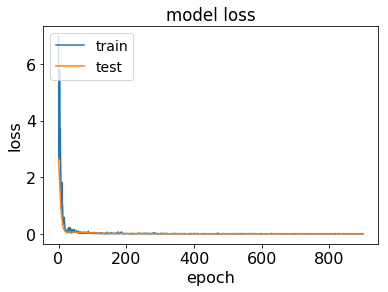

In [59]:
train = [r[7] for r in ql_loss['train']]
test = [r[7] for r in ql_loss['test']]

validation_loss(train, test)

#### Triplet loss centroids

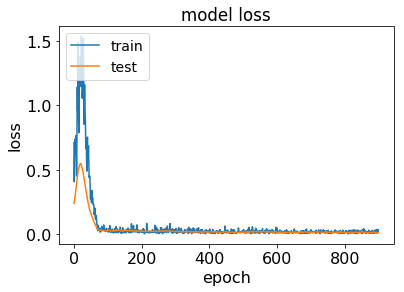

In [60]:
train = [r[8] for r in ql_loss['train']]
test = [r[8] for r in ql_loss['test']]

validation_loss(train, test)

### Classification

In [69]:
rows = []

for epoch in ['1000']:
    for domain in domains:
        # Dataset paths
        DIR = 'data/processed/{}/{}/'.format(domain, PREPROCESSING)

        for method in methods[epoch]:
            path = os.path.join(DIR, 'classification_{}.pkl'.format(method))

            try:
                with open(path, 'rb') as f:
                    result = pickle.load(f)

                print(path)

                rows.append({ 'autor': authors[result['method']], 'acurácia' : round(result['acc_test'], 3), 'roc/auc' : round(result['roc_test'], 3),  
                             'domain' : domain })
            except:
                print("Does not exist result for: {}".format(path))
                pass
    
df_cls = pd.DataFrame(data=rows, columns=['autor', 'acurácia', 'roc/auc', 'domain'])

data/processed/eclipse/bert/classification_baseline_1000.pkl
data/processed/eclipse/bert/classification_baseline_dwen_1000.pkl
data/processed/eclipse/bert/classification_deepQL_topics_1000.pkl
data/processed/eclipse/bert/classification_deepQL_topics_trainable_1000.pkl
data/processed/eclipse/bert/classification_deepQL_trainable_1000.pkl
data/processed/eclipse/bert/classification_deepQL_no_trainable_1000.pkl
data/processed/eclipse/bert/classification_deepTL_1000.pkl
data/processed/eclipse/bert/classification_deepTL_topics_1000.pkl
data/processed/netbeans/bert/classification_baseline_1000.pkl
data/processed/netbeans/bert/classification_baseline_dwen_1000.pkl
data/processed/netbeans/bert/classification_deepQL_topics_1000.pkl
data/processed/netbeans/bert/classification_deepQL_topics_trainable_1000.pkl
data/processed/netbeans/bert/classification_deepQL_trainable_1000.pkl
data/processed/netbeans/bert/classification_deepQL_no_trainable_1000.pkl
data/processed/netbeans/bert/classification_deepT

In [75]:
df_cls[df_cls['domain'] == 'netbeans']

,autor,acurácia,roc/auc,domain
8,DMS,0.818,0.818,netbeans
9,DWEN,0.709,0.794,netbeans
10,DeepQL_topics,0.845,0.845,netbeans
11,DeepQL_topics_trainable,0.851,0.851,netbeans
12,DeepQL_trainable,0.832,0.832,netbeans
13,DeepQL,0.837,0.837,netbeans
14,DeepTL,0.630,0.630,netbeans
15,DeepTL_topics,0.766,0.766,netbeans


In [129]:
df_cls.to_csv('classification_report.csv', index=False)

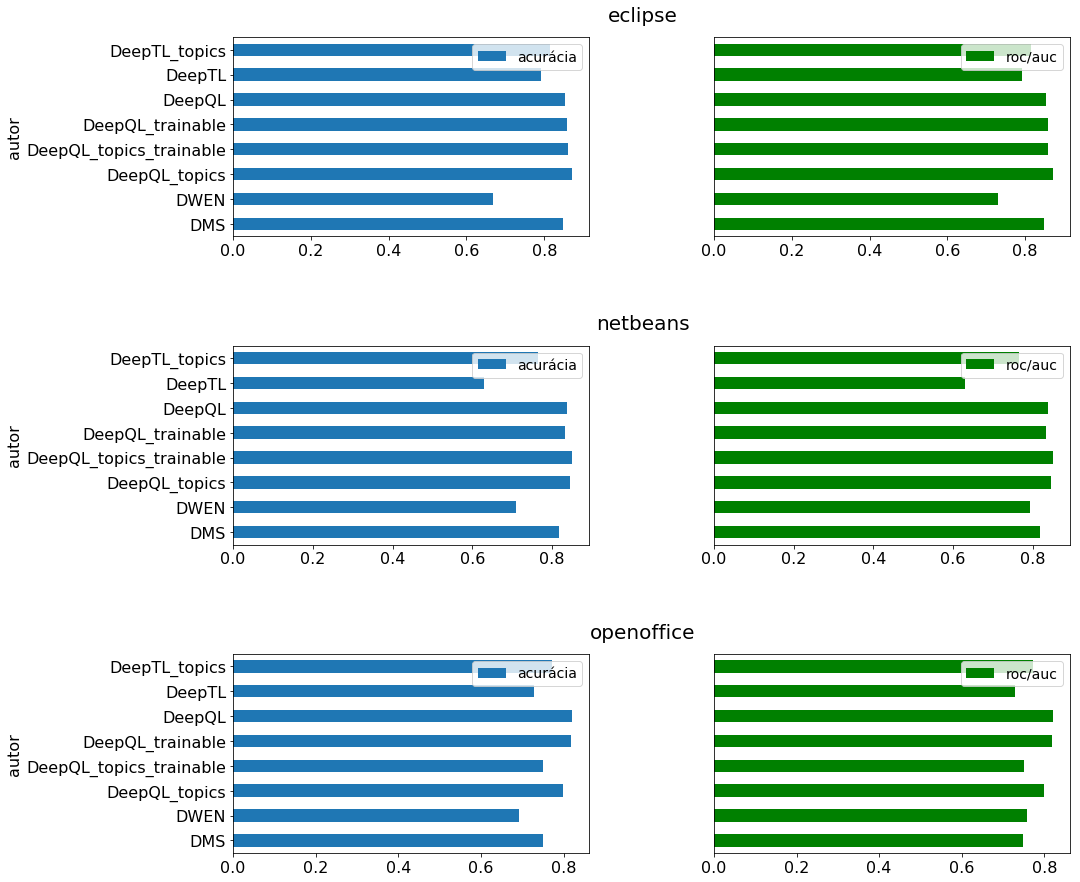

In [71]:
fig, axes = plt.subplots(nrows=len(domains), ncols=2, figsize=(15, 15))

for row, domain in enumerate(domains): 
    plt.text(1.15, 1.08, domain,
         horizontalalignment='center',
         fontsize=20,
         transform = axes[row, 0].transAxes)
    ax = df_cls[df_cls['domain'] == domain].set_index('autor')[['acurácia']].plot.barh(ax=axes[row, 0])
    #ax.set_title(domain)
    ax = df_cls[df_cls['domain'] == domain].set_index('autor')[['roc/auc']].plot.barh(ax=axes[row, 1], color='g')
    ax.get_yaxis().set_visible(False)
    #ax.set_title(domain)
    
plt.subplots_adjust(hspace=0.55,
                    wspace=0.35)

In [132]:
np.random.rand(10, 4)

array([[0.38216549, 0.37996941, 0.83583889, 0.01358859],
       [0.63119126, 0.50848203, 0.04975416, 0.21726124],
       [0.28808504, 0.83388781, 0.59455592, 0.13964893],
       [0.97261595, 0.6477938 , 0.74758768, 0.9542933 ],
       [0.99736946, 0.77699944, 0.56724796, 0.16743348],
       [0.60036899, 0.54963532, 0.96207951, 0.36730877],
       [0.90727808, 0.39419999, 0.80537883, 0.23149691],
       [0.26193345, 0.58235132, 0.60003615, 0.94201377],
       [0.97771674, 0.16865232, 0.18286236, 0.08616357],
       [0.71382924, 0.21411415, 0.84617668, 0.27534101]])

In [134]:
df_cls.head()

,autor,acurácia,roc/auc,domain
0,DMS,0.848,0.848,eclipse
1,DWEN,0.668,0.730,eclipse
2,DeepQL_topics,0.872,0.872,eclipse
3,DeepQL_topics_trainable,0.860,0.860,eclipse
4,DeepQL_trainable,0.859,0.859,eclipse


In [138]:
df_cls.transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
autor,DMS,DWEN,DeepQL_topics,DeepQL_topics_trainable,DeepQL_trainable,DeepQL,DeepTL,DeepTL_topics,DMS,DWEN,...,DeepTL,DeepTL_topics,DMS,DWEN,DeepQL_topics,DeepQL_topics_trainable,DeepQL_trainable,DeepQL,DeepTL,DeepTL_topics
acurácia,0.848,0.668,0.872,0.86,0.859,0.853,0.792,0.814,0.818,0.709,...,0.63,0.766,0.749,0.692,0.799,0.75,0.819,0.821,0.729,0.772
roc/auc,0.848,0.73,0.872,0.86,0.859,0.853,0.792,0.814,0.818,0.794,...,0.63,0.766,0.749,0.758,0.799,0.75,0.819,0.821,0.729,0.772
domain,eclipse,eclipse,eclipse,eclipse,eclipse,eclipse,eclipse,eclipse,netbeans,netbeans,...,netbeans,netbeans,openoffice,openoffice,openoffice,openoffice,openoffice,openoffice,openoffice,openoffice


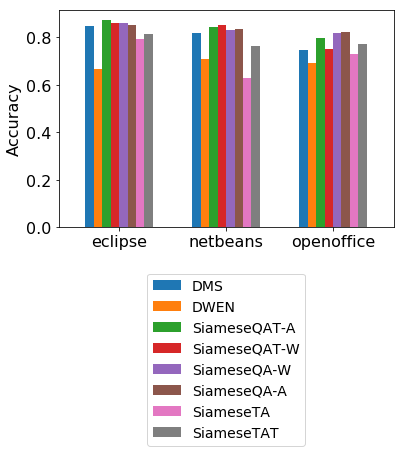

In [195]:
report = df_cls.transpose()
methods_acc = report.loc['autor'][:8]
methods_acc = [friendly_names[method] for method in methods_acc]
eclipse_acc = report.loc['acurácia'][:8]
netbeans_acc = report.loc['acurácia'][8:16]
openoffice_acc = report.loc['acurácia'][16:24]

acc = np.concatenate([[eclipse_acc], [netbeans_acc], [openoffice_acc]], 0)

df_acc = pd.DataFrame(acc, columns=methods_acc, index=domains)

ax = df_acc.plot.bar(width=0.63)
ax.set_ylabel("Accuracy")
ax.set_xticklabels(domains, rotation = 0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))
fig = ax.get_figure()
fig.savefig('{}.png'.format('classification_plot'), bbox_inches="tight")